In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from baggingClassifier import MyBaggingClassifier
import matplotlib.pyplot as plt

In [13]:
bigDataset = make_classification(n_samples=2000, n_features=10, n_informative=7)
smallDataset = make_classification(n_samples=300, n_features=10, n_informative=7)
bigDatasetTargets =  bigDataset[1]
smallDatasetTargets = smallDataset[1]
bigDataset = bigDataset[0]
smallDataset = smallDataset[0]

In [14]:
enc = OneHotEncoder(n_values = 2000, handle_unknown = 'error', sparse = False)
enc.fit(bigDataset.round() + 15)
print(enc.n_values_)
bigDatasetTransformed = enc.transform(bigDataset.round()+15)

[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [15]:
bigDataset_X_train, bigDataset_X_test, bigDataset_Y_train, bigDataset_Y_test = train_test_split(bigDataset, bigDatasetTargets, test_size = 0.3)
bigDatasetTransformed_X_train, bigDatasetTransformed_X_test, bigDatasetTransformed_Y_train, bigDatasetTransformed_Y_test = train_test_split(bigDatasetTransformed, bigDatasetTargets, test_size = 0.3)
smallDataset_X_train, smallDataset_X_test, smallDataset_Y_train, smallDataset_Y_test = train_test_split(smallDataset, smallDatasetTargets, test_size = 0.3)

In [16]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(bigDatasetTransformed_X_train, bigDatasetTransformed_Y_train)
print (accuracy_score(tree_clf.predict(bigDatasetTransformed_X_test), bigDatasetTransformed_Y_test))

0.8266666666666667


In [18]:
import numpy as np
my_bgc = MyBaggingClassifier(tree_clf, n_estimators=100, max_samples=110, max_features=10)
my_bgc.fit(smallDataset_X_train, smallDataset_Y_train)
y = my_bgc.predict(smallDataset_X_test)
print(accuracy_score(y, smallDataset_Y_test))

0.8222222222222222


In [19]:
myBaggingClassifierError = []
for n in range (1,30):
    my_bgc = MyBaggingClassifier(tree_clf, n_estimators=n, max_samples=110, max_features=10)
    my_bgc.fit(bigDataset_X_train, bigDataset_Y_train)
    y = my_bgc.predict(bigDataset_X_test)
    myBaggingClassifierError.append(accuracy_score(y, bigDataset_Y_test))

In [20]:
baggingClassifierError = []
for n in range (1,30):
    bgc = BaggingClassifier(tree_clf, n_estimators=n, max_samples=110, max_features=10)
    bgc.fit(smallDataset_X_train, smallDataset_Y_train)
    y = bgc.predict(smallDataset_X_test)
    baggingClassifierError.append(accuracy_score(y, smallDataset_Y_test))

In [21]:
randomForestClassifierError = []
for n in range (1,30):
    bgc = RandomForestClassifier(n_estimators=n, max_features=8)
    bgc.fit(bigDataset_X_train, bigDataset_Y_train)
    y = bgc.predict(bigDataset_X_test)
    randomForestClassifierError.append(accuracy_score(y, bigDataset_Y_test))

In [22]:
gradientBoostingClassifierError = []
for n in range (1,30):
    bgc = GradientBoostingClassifier(n_estimators=n, max_features=8)
    bgc.fit(bigDataset_X_train, bigDataset_Y_train)
    y = bgc.predict(bigDataset_X_test)
    gradientBoostingClassifierError.append(accuracy_score(y, bigDataset_Y_test))

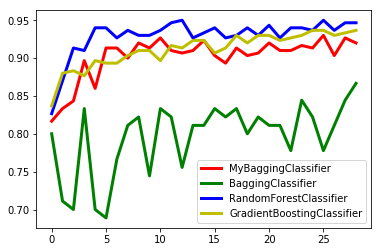

In [23]:
plt.plot(myBaggingClassifierError, 'r', lw=3, label='MyBaggingClassifier')
plt.plot(baggingClassifierError, 'g', lw=3, label='BaggingClassifier')
plt.plot(randomForestClassifierError, 'b', lw=3, label='RandomForestClassifier')
plt.plot(gradientBoostingClassifierError, 'y', lw=3, label='GradientBoostingClassifier')

plt.legend()
plt.show()